In [32]:
#load the excel file /home/akata/mdani31/official_semiollm/semiollm/data_files/fig3d_data.xlsx and read columns 1 to 5
import pandas as pd
df = pd.read_excel('../data_files/fig3d_data.xlsx')
df = df.iloc[:, 1:5]
#load data in each column into a list
response_gpt_1 = df.iloc[:, 0].tolist()
response_mixtral_1 = df.iloc[:, 1].tolist()
response_gpt_2 = df.iloc[:, 2].tolist()
response_mixtral_2 = df.iloc[:, 3].tolist()

In [33]:
#count total Y and N for each model
def count_responses(responses):
    count_Y = responses.count('Y')
    count_N = responses.count('N')
    return count_Y, count_N

gpt_1_Y, gpt_1_N = count_responses(response_gpt_1)
mixtral_1_Y, mixtral_1_N = count_responses(response_mixtral_1)
gpt_2_Y, gpt_2_N = count_responses(response_gpt_2)
mixtral_2_Y, mixtral_2_N = count_responses(response_mixtral_2)
print(f"GPT-4 Annotator 1: Y={gpt_1_Y}, N={gpt_1_N}")
print(f"Mixtral-8x7B Annotator 1: Y={mixtral_1_Y}, N={mixtral_1_N}")
print(f"GPT-4 Annotator 2: Y={gpt_2_Y}, N={gpt_2_N}")
print(f"Mixtral-8x7B Annotator 2: Y={mixtral_2_Y}, N={mixtral_2_N}")

GPT-4 Annotator 1: Y=61, N=16
Mixtral-8x7B Annotator 1: Y=13, N=68
GPT-4 Annotator 2: Y=63, N=18
Mixtral-8x7B Annotator 2: Y=18, N=61


In [13]:
#count total Y and N for each model
def count_responses(responses):
    count_Y = responses.count("Y ")
    count_N = responses.count("N ")
    return count_Y, count_N

gpt_1_Y, gpt_1_N = count_responses(response_gpt_1)
mixtral_1_Y, mixtral_1_N = count_responses(response_mixtral_1)
gpt_2_Y, gpt_2_N = count_responses(response_gpt_2)
mixtral_2_Y, mixtral_2_N = count_responses(response_mixtral_2)
print(f"GPT-3.5 Annotator 1: Y={gpt_1_Y}, N={gpt_1_N}")
print(f"Mixtral-8x7B Annotator 1: Y={mixtral_1_Y}, N={mixtral_1_N}")
print(f"GPT-3.5 Annotator 2: Y={gpt_2_Y}, N={gpt_2_N}")
print(f"Mixtral-8x7B Annotator 2: Y={mixtral_2_Y}, N={mixtral_2_N}")

GPT-3.5 Annotator 1: Y=60, N=16
Mixtral-8x7B Annotator 1: Y=13, N=68
GPT-3.5 Annotator 2: Y=63, N=18
Mixtral-8x7B Annotator 2: Y=18, N=62


In [23]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(response_gpt_1, response_gpt_2)
print(kappa)
kappa_2 = cohen_kappa_score(response_mixtral_1, response_mixtral_2)
print(kappa_2)

0.7333333333333334
0.7397888939880679


In [25]:
#ANNOTATOR 1 Result

acc_gpt_1 = 0
acc_mixtral_1 = 0

#count Y in each list and divide by length of list
for i in response_gpt_1:
    if i == 'Y':
        acc_gpt_1 += 1

for i in response_mixtral_1:
    if i == 'Y':
        acc_mixtral_1 += 1

acc_gpt_1 = acc_gpt_1/len(response_gpt_1)
acc_mixtral_1 = acc_mixtral_1/len(response_mixtral_1)
print(acc_gpt_1, acc_mixtral_1)



0.7530864197530864 0.16049382716049382


In [26]:
#ANNOTATOR 2 Result

acc_gpt_2 = 0
acc_mixtral_2 = 0

#count Y in each list and divide by length of list
for i in response_gpt_2:
    if i == 'Y':
        acc_gpt_2 += 1

for i in response_mixtral_2:
    if i == 'Y':
        acc_mixtral_2 += 1

acc_gpt_2 = acc_gpt_2/len(response_gpt_2)
acc_mixtral_2 = acc_mixtral_2/len(response_mixtral_2)
print(acc_gpt_2, acc_mixtral_2)

0.7777777777777778 0.2222222222222222


In [27]:
import math

def truncate(val, decimals=2):
    factor = 10 ** decimals
    return math.floor(val * factor) / factor

Duplicate key in file '/mnt/lustre/home/akata/mdani31/official_semiollm/semiollm/visualization/.matplotlibrc', line 15 ('font.sans-serif      : Arial, sans-serif')
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic

[76.54, 19.13]


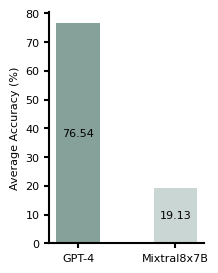

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import os

current_dir = os.path.dirname(os.path.abspath('__file__'))
format_file = os.path.join(current_dir, '.matplotlibrc')
with mpl.rc_context(fname=format_file):
    # Data
    models = ['GPT-4', 'Mixtral8x7B']
    accuracy_evaluator_1 = [acc_gpt_1*100, acc_mixtral_1*100]
    accuracy_evaluator_2 = [acc_gpt_2*100, acc_mixtral_2*100]

    # Calculating the average accuracy for a simple representation
    average_accuracy = [truncate((a + b) / 2) for a, b in zip(accuracy_evaluator_1, accuracy_evaluator_2)]
    print(average_accuracy)
    # Creating the figure and the axes with figure size 10x8
    fig, ax = plt.subplots(figsize=(2, 3))
    bar_width = 0.45
    colors = ['#52796F', '#52796F']
    alphas = [0.7, 0.3]

    # Plotting each bar with its respective alpha value
    bars = []
    for i in range(len(models)):
        bars.append(ax.bar(models[i], average_accuracy[i], bar_width, color=colors[i], alpha=alphas[i]))

    # Adding text annotations inside the bars        
    for bar, value in zip(bars, average_accuracy):
        ax.text(bar[0].get_x() + bar[0].get_width() / 2,  # Centered in the bar
                bar[0].get_height() / 2,  # Centered in the bar
                f'{value:.2f}',  # Format as percentage
                va='center', ha='center', color='black')

    plt.ylabel('Average Accuracy (%)')
    #plt.savefig('final_citation_result.svg', format='svg', dpi=600)
    plt.show()